In [1]:
#!pip install tables

In [2]:
!pip install bs4

You should consider upgrading via the 'C:\Users\shiva\OneDrive\Documents\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install nltk

You should consider upgrading via the 'C:\Users\shiva\OneDrive\Documents\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install textblob

You should consider upgrading via the 'C:\Users\shiva\OneDrive\Documents\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\shiva\OneDrive\Documents\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install --upgrade wordcloud

You should consider upgrading via the 'C:\Users\shiva\OneDrive\Documents\python.exe -m pip install --upgrade pip' command.


In [7]:
import nltk

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Import Libraries

In [97]:
import json
import gzip
import pandas as pd
import re
import unicodedata
import string
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Data Rearrangement

**Splitting Product Data into Chunks**

In [11]:

#with open(r'C:\Users\shiva\My PC (LAPTOP-2R30LAFS)\Downloads\Electronics_5.json\Electronics_5.json', 'r') as file:
    # Define chunk size
#    chunk_size = 20000  

#    product_df = []

#    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
#        print(chunk.head())
#        product_df.append(chunk)       

In [12]:
#product_df[0].columns

**Combining the chunks**

In [13]:
#combined_df = pd.concat(results)

**Read Product Data**

In [14]:
#product_df = pd.read_csv(r'C:\Users\shiva\My PC (LAPTOP-2R30LAFS)\Downloads\Electronics_data.csv')  #read the combined dataframe
#with pd.HDFStore('dataframes.h5') as store:
#    dataframes = {key: store[key] for key in store.keys()}   #read the chunked dataframes

**Split Metadata into chunks**

In [15]:
#with open(r'C:\Users\shiva\My PC (LAPTOP-2R30LAFS)\Downloads\meta_Electronics.json\meta_Electronics.json', 'r') as file:
#    chunk_size = 20000 
#
#    meta_df = []
#
#    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
#        print(chunk.head())
#        meta_df.append(chunk)

**Keeping Only those Rows where the Title has Headphones**

In [16]:
#for i in range(len(meta_df)):
#    meta_df[i] = meta_df[i][meta_df[i]['title'].str.contains('Headphones', case=False)]


**Combining the Chunks**

In [17]:
#final_metadf = pd.concat(meta_df)

In [18]:
#type(final_metadf)

**Saving the metadata as CSV**

In [19]:
#final_metadf.to_csv('final_metadata.csv')

# Implementation

**Loading the Metadata & Product Data**

In [20]:
meta_df = pd.read_csv(r'C:\Users\shiva\My PC (LAPTOP-2R30LAFS)\Downloads\final_metadata.csv')

In [21]:
product_df = pd.read_csv(r'C:\Users\shiva\My PC (LAPTOP-2R30LAFS)\Downloads\Electronics_data.csv')

C:\Users\shiva\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3526: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Correct the Structure of Dataframes**

In [22]:
meta_df.shape

(18210, 20)

In [23]:
product_df.shape

(6739590, 12)

In [24]:
meta_df.columns

Index(['Unnamed: 0', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL',
       'imageURLHighRes', 'details'],
      dtype='object')

**Drop Column 0**

In [25]:
meta_df = meta_df.drop('Unnamed: 0', axis=1)

In [26]:
meta_df.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

**Replacing NaN values with 0**

In [27]:
meta_df.fillna(0, inplace=True)

In [28]:
product_df.fillna(0, inplace=True)

**Drop Duplicates**

In [29]:
meta_df.drop_duplicates(inplace=True)

In [30]:
product_df.drop_duplicates(inplace=True)

In [31]:
product_df.shape

(6556546, 12)

In [32]:
meta_df.shape

(17810, 19)

In [33]:
product_df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,67.0,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,0
1,3,5.0,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,0
2,5,4.0,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,0
3,5,13.0,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,0
4,3,8.0,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6739585,4,0,True,"03 21, 2017",A33MAQA919J2V8,B01HJH40WU,0,Kurt Wurm,"These seem like quality USB cables, time will ...",Four Stars,1490054400,0
6739586,4,0,True,"01 9, 2017",A1AKHSCPD1BHM4,B01HJH40WU,0,C.L Momof3,"Works great, love the longer cord. As with any...",Nice long cord,1483920000,0
6739587,5,2.0,True,"12 1, 2016",A2HUZO7MQAY5I2,B01HJH40WU,0,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400,0
6739588,5,2.0,True,"11 29, 2016",AJJ7VX2L91X2W,B01HJH40WU,0,Faith,Works well.,Five Stars,1480377600,0


In [34]:
meta_df.reset_index(inplace=True)

In [35]:
meta_df.drop(columns='index', inplace=True)

In [36]:
meta_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>True High Definition Sound:</b><br>Wi...",0.0,Wireless Bluetooth Headphones Earbuds with Mic...,[],0,Enter The Arena,['Superb Sound Quality: Plays crystal clear au...,['>#950 in Cell Phones & Accessories (See Top ...,[],Home Audio & Theater,0,"October 23, 2017",$7.99,0132492776,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
1,"['Electronics', 'Headphones']",0,['Use these high quality headphones for intern...,0.0,Polaroid Pbm2200 PC / Gaming Stereo Headphones...,[],0,Polaroid,"['Ideal for PC Internet chatting, PC / Console...","['>#3,548,269 in Cell Phones &amp; Accessories...",[],All Electronics,0,"December 13, 2012",0,0558835155,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
2,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>True High Definition Sound:</b><br>Wi...",0.0,Bluetooth Workout Headphones for Running and G...,[],0,Enter The Arena,['Superb Sound Quality: Plays crystal clear au...,"['>#4,626,934 in Cell Phones & Accessories (Se...",[],Home Audio & Theater,0,"December 28, 2015",0,0692206280,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
3,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>True High Definition Sound:</b><br />...",0.0,Bluetooth Workout Headphones for Running and G...,[],0,Enter The Arena,['Superb Sound Quality: Plays crystal clear au...,"['>#2,654,020 in Cell Phones &amp; Accessories...",[],Home Audio &amp; Theater,0,"October 18, 2015",0,0983629269,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
4,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>True High Definition Sound:</b><br />...",0.0,Bluetooth Workout Headphones for Running and G...,[],0,Enter The Arena,['Superb Sound Quality: Plays crystal clear au...,"['>#5,289,289 in Cell Phones &amp; Accessories...",[],Home Audio &amp; Theater,0,"April 26, 2013",0,0985262788,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17805,"['Electronics', 'Headphones', 'Earbud Headphon...",0,[],0.0,"Bluetooth Headphones,Yostyle Wireless Headphon...",['B01I0U77O8'],0,Yostyle,"['With Bluetooth V4.1, advanced apt-X technolo...","['>#186,311 in Cell Phones & Accessories (See ...","['B01I0U77O8', 'B010RQWSE2', 'B00PGJWYJ0', 'B0...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",$9.91,B01HJ8E11E,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
17806,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>Specification</b></br> Driver: 5mm</b...",0.0,MAXROCK Noise Isolating Sleeping Headphones Ea...,[],0,MAXROCK,"['Unique patented silicone design headphones, ...","['>#21,087 in Musical Instruments (See Top 100...","['B071WRSL38', 'B00XCDOGY8', 'B00V9FN1R4', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",0,B01HJAVYDU,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
17807,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"[""About the product Rhapsody & Mogan H9 is a ...",0.0,"Wireless Bluetooth Headset, HandsFree Wireless...",[],0,snorain,['COMFORTABLE CUSTOM FIT Rhapsody & Mogan noi...,"['>#343,752 in Cell Phones & Accessories (See ...","['B01D3QZB2Y', 'B079GFF4HZ', 'B00XBZY0EI', 'B0...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","June 25, 2016",0,B01HJAPNHI,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/i

**Keep only those rows in Product Data where the ASIN is in Metadata**

In [37]:
valid_asin_values = meta_df['asin']

In [38]:
valid_asin_values

0        0132492776
1        0558835155
2        0692206280
3        0983629269
4        0985262788
            ...    
17805    B01HJ8E11E
17806    B01HJAVYDU
17807    B01HJAPNHI
17808    B01HJAVZI4
17809    B01HJAVXMC
Name: asin, Length: 17810, dtype: object

In [39]:
product_df = product_df[product_df['asin'].isin(valid_asin_values)]

In [40]:
product_df.reset_index(inplace=True)

In [41]:
product_df.drop(columns='index', inplace=True)

c:\Users\shiva\OneDrive\Documents\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
product_df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2.0,True,"02 28, 2013",A15U5NUS1EY7IQ,B000001OMI,{'Format:': ' Personal Computers'},S. Bommarito,I'm getting listening stations going in severa...,Works well,1362009600,0
1,5,5.0,True,"10 17, 2012",AHGGNAIT6BH5X,B000001OMI,0,Edward H,Needed Headset for watching and editing videos...,HP 200 Stereo Headset,1350432000,0
2,4,0,False,"09 27, 2012",A33HUURDJ4DVG3,B000001OMI,{'Format:': ' Personal Computers'},HB,I was out of town for a month and needed a pai...,"For the price, you cannot beat them",1348704000,0
3,5,4.0,True,"11 27, 2008",A680RUE1FDO8B,B000001OMI,{'Format:': ' Personal Computers'},Jerry Saperstein,Obviously these headphones are not for the aud...,Excellent day-to-day headphones,1227744000,0
4,3,2.0,False,"12 24, 2007",A3OLAZKM77XR6P,B000001OMI,{'Format:': ' Personal Computers'},Tennis Ace,I bought these headphones at a Tower Records a...,Foldable but didn't last long,1198454400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
261115,5,0,True,"05 4, 2018",A3E7OV7IR941JI,B01HI7D4VY,0,JC,I used these for tail light replacement bulbs ...,Excellent LEDS,1525392000,0
261116,3,0,True,"03 14, 2018",A26I2RPRWOGD2V,B01HI7D4VY,0,Ray,Not the brightest bulb on the block.,Not the brightest bulb on the block.,1520985600,0
261117,4,0,True,"09 22, 2018",A3VA3VK4PO1JD,B01HJ8E11E,{'Color:': ' White'},CD,I have only used these for 1 week at the time ...,They work...,1537574400,0
261118,3,0,True,"09 12, 2018",A11TVS6FKXS80H,B01HJ8E11E,{'Color:': ' White'},Jay Salamon,"The product works great, but when it gets down...",30% charge shuts the device off,1536710400,0


# Descriptive Statistics of the Product

**a) Number of reviews for each ASIN**

In [43]:
reviews_per_asin = {}
for index, row in product_df.iterrows():
    if row['asin'] not in reviews_per_asin:
        reviews_per_asin[row['asin']] = 1
    else:
        reviews_per_asin[row['asin']] += 1
        
print(reviews_per_asin)

{'B000001OMI': 41, 'B00000DMA3': 11, 'B00000J1FV': 6, 'B00000J1GA': 12, 'B00000JBHP': 66, 'B00001OPK7': 7, 'B00001P505': 198, 'B00001P4ZH': 1158, 'B00001P4XA': 380, 'B00001P4ZR': 9, 'B00001W0D5': 8, 'B00001W0DG': 14, 'B00001W0DC': 26, 'B00001WRSJ': 1104, 'B00001W0DD': 34, 'B00001W0D4': 10, 'B00004LC7Z': 8, 'B00004SD87': 8, 'B00004SD88': 12, 'B00004T8R2': 1707, 'B00004T8R4': 6, 'B00004TZJQ': 7, 'B00004TZJI': 6, 'B00004TZJJ': 5, 'B00004Z0BP': 6, 'B00004Z5D1': 415, 'B00004Z7G9': 118, 'B00004Z6Q6': 28, 'B00005105L': 56, 'B000056SJT': 10, 'B000056SJU': 6, 'B00005BYER': 7, 'B00005K3LZ': 5, 'B00005N6KF': 16, 'B00005N6KG': 456, 'B00005N9D2': 72, 'B00005N9D3': 542, 'B00005OTG6': 35, 'B00005QBU9': 374, 'B00005QBUU': 102, 'B00005R8Q1': 7, 'B00005R8PV': 6, 'B00005R8PW': 8, 'B00005RFD3': 370, 'B00005T3SQ': 8, 'B000065BP9': 567, 'B000065BPA': 42, 'B000065BPC': 30, 'B000065BPB': 828, 'B000066CCU': 46, 'B000067FCS': 15, 'B000067G0J': 89, 'B000067SBB': 30, 'B000068IFM': 19, 'B00006B9W9': 13, 'B00006HOG

**b) Average Rating Score for each ASIN**

In [44]:
ratings_per_asin = {}
for index, row in product_df.iterrows():
    if row['asin'] not in ratings_per_asin:
        ratings_per_asin[row['asin']] = []
        ratings_per_asin[row['asin']].append(int(row['overall']))
    else:
        ratings_per_asin[row['asin']].append((row['overall']))
        
for asin in ratings_per_asin:
    ratings_per_asin[asin] = sum(ratings_per_asin[asin])/len(ratings_per_asin[asin])
    
print(ratings_per_asin)

{'B000001OMI': 3.975609756097561, 'B00000DMA3': 4.0, 'B00000J1FV': 3.0, 'B00000J1GA': 3.25, 'B00000JBHP': 4.2272727272727275, 'B00001OPK7': 3.857142857142857, 'B00001P505': 4.318181818181818, 'B00001P4ZH': 4.442141623488774, 'B00001P4XA': 3.9526315789473685, 'B00001P4ZR': 4.0, 'B00001W0D5': 3.75, 'B00001W0DG': 3.7857142857142856, 'B00001W0DC': 4.115384615384615, 'B00001WRSJ': 4.618659420289855, 'B00001W0DD': 3.676470588235294, 'B00001W0D4': 4.4, 'B00004LC7Z': 3.25, 'B00004SD87': 3.25, 'B00004SD88': 4.25, 'B00004T8R2': 4.330404217926186, 'B00004T8R4': 3.8333333333333335, 'B00004TZJQ': 3.5714285714285716, 'B00004TZJI': 4.166666666666667, 'B00004TZJJ': 3.4, 'B00004Z0BP': 4.333333333333333, 'B00004Z5D1': 4.506024096385542, 'B00004Z7G9': 4.245762711864407, 'B00004Z6Q6': 3.9285714285714284, 'B00005105L': 3.8392857142857144, 'B000056SJT': 3.8, 'B000056SJU': 2.8333333333333335, 'B00005BYER': 3.4285714285714284, 'B00005K3LZ': 2.8, 'B00005N6KF': 3.6875, 'B00005N6KG': 4.109649122807017, 'B00005N9

**c) Number of Unique Products**

In [45]:
num_unique_products = product_df['asin'].nunique()
print(num_unique_products)

5393


**d) Number of Good Ratings and Bad Ratings**

In [46]:
good_rating = []
bad_rating = []

for index, row in product_df.iterrows():
    if row['overall'] >=3:
        good_rating.append((row['overall'], row['reviewText']))
    else:
        bad_rating.append((row['overall'], row['reviewText']))
        
        
print('Number of Good Ratings:', len(good_rating))
print('Number of Bad Ratings:', len(bad_rating))

Number of Good Ratings: 222660
Number of Bad Ratings: 38460


**Number of Reviews for each Rating**

In [47]:
print('Number of Reviews for Good Rating:', len(good_rating))
print('Number of Reviews for Bad Rating:', len(bad_rating))

Number of Reviews for Good Rating: 222660
Number of Reviews for Bad Rating: 38460


# Text Preprocessing

In [48]:
meta_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>True High Definition Sound:</b><br>Wi...",0.0,Wireless Bluetooth Headphones Earbuds with Mic...,[],0,Enter The Arena,['Superb Sound Quality: Plays crystal clear au...,['>#950 in Cell Phones & Accessories (See Top ...,[],Home Audio & Theater,0,"October 23, 2017",$7.99,0132492776,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
1,"['Electronics', 'Headphones']",0,['Use these high quality headphones for intern...,0.0,Polaroid Pbm2200 PC / Gaming Stereo Headphones...,[],0,Polaroid,"['Ideal for PC Internet chatting, PC / Console...","['>#3,548,269 in Cell Phones &amp; Accessories...",[],All Electronics,0,"December 13, 2012",0,0558835155,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
2,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>True High Definition Sound:</b><br>Wi...",0.0,Bluetooth Workout Headphones for Running and G...,[],0,Enter The Arena,['Superb Sound Quality: Plays crystal clear au...,"['>#4,626,934 in Cell Phones & Accessories (Se...",[],Home Audio & Theater,0,"December 28, 2015",0,0692206280,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
3,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>True High Definition Sound:</b><br />...",0.0,Bluetooth Workout Headphones for Running and G...,[],0,Enter The Arena,['Superb Sound Quality: Plays crystal clear au...,"['>#2,654,020 in Cell Phones &amp; Accessories...",[],Home Audio &amp; Theater,0,"October 18, 2015",0,0983629269,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0
4,"['Electronics', 'Headphones', 'Earbud Headphon...",0,"['', '<b>True High Definition Sound:</b><br />...",0.0,Bluetooth Workout Headphones for Running and G...,[],0,Enter The Arena,['Superb Sound Quality: Plays crystal clear au...,"['>#5,289,289 in Cell Phones &amp; Accessories...",[],Home Audio &amp; Theater,0,"April 26, 2013",0,0985262788,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,0


In [49]:
product_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2.0,True,"02 28, 2013",A15U5NUS1EY7IQ,B000001OMI,{'Format:': ' Personal Computers'},S. Bommarito,I'm getting listening stations going in severa...,Works well,1362009600,0
1,5,5.0,True,"10 17, 2012",AHGGNAIT6BH5X,B000001OMI,0,Edward H,Needed Headset for watching and editing videos...,HP 200 Stereo Headset,1350432000,0
2,4,0,False,"09 27, 2012",A33HUURDJ4DVG3,B000001OMI,{'Format:': ' Personal Computers'},HB,I was out of town for a month and needed a pai...,"For the price, you cannot beat them",1348704000,0
3,5,4.0,True,"11 27, 2008",A680RUE1FDO8B,B000001OMI,{'Format:': ' Personal Computers'},Jerry Saperstein,Obviously these headphones are not for the aud...,Excellent day-to-day headphones,1227744000,0
4,3,2.0,False,"12 24, 2007",A3OLAZKM77XR6P,B000001OMI,{'Format:': ' Personal Computers'},Tennis Ace,I bought these headphones at a Tower Records a...,Foldable but didn't last long,1198454400,0


In [50]:
meta_df.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

**a) Remove HTML Tags**

In [51]:
def remove_html_tags(text):
    if isinstance(text, str):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    else:
        return ""

**b) Remove Accented Characters**

In [52]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

**d) Remove Special Characters**

In [53]:
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

**e) Lemmatization**

In [54]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = " ".join(lemmatized_words)
    return lemmatized_text

**f) Normalize Text**

In [55]:
stop_words = set(stopwords.words('english'))

def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into text
    normalized_text = ' '.join(tokens)
    
    return normalized_text

**Combine all the preprocessing steps**

In [56]:
def preprocess_text(text):
    
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    
    text = normalize_text(text)
    return text

**Apply Text Preprocessing on Columns**

In [57]:
product_df['reviewText'] = product_df['reviewText'].apply(preprocess_text)

C:\Users\shiva\AppData\Local\Temp\ipykernel_19944\1661441417.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\shiva\AppData\Local\Temp\ipykernel_19944\1661441417.py:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\shiva\AppData\Local\Temp\ipykernel_19944\3358378549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['reviewText'] = product_df['reviewText'].apply(pre

In [58]:
#apply preprocessing on more rows

# EDA

**a) Top 20 most reviewd brands**

In [59]:
brand_dict = {}   #keep brand:count
for index, row in product_df.iterrows():
    df = meta_df[meta_df['asin']==row['asin']]   #Find the row that matches asin=asin
    brand = df['brand'][df.index[0]]      #find the brand
    
    if brand not in brand_dict:
        brand_dict[brand] = 1
    else:
        brand_dict[brand] += 1
            
print('Number of Brands:', len(brand_dict))

Number of Brands: 1639


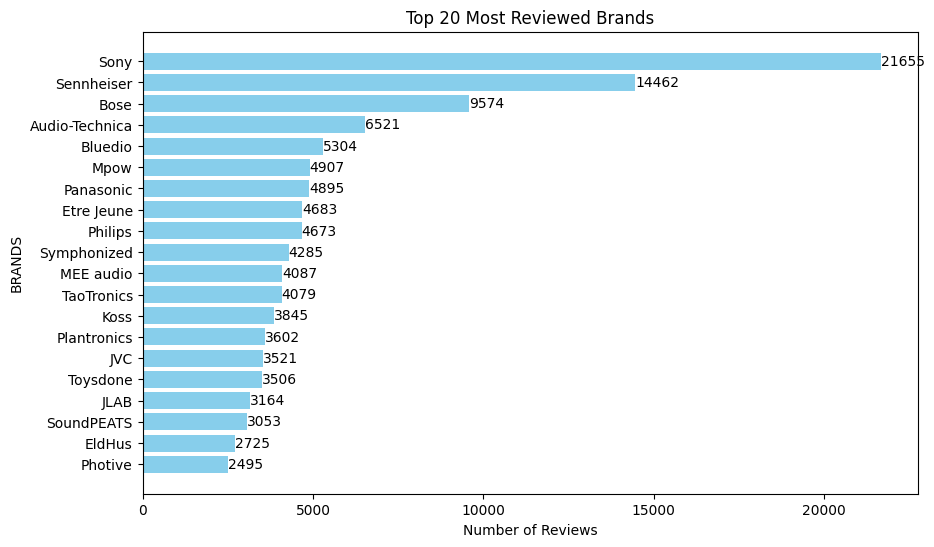

In [60]:
top_20_asins = sorted(brand_dict.items(), key=lambda x: x[1], reverse=True)[:20]

brands = [brand[0] for brand in top_20_asins]
review_counts = [brand[1] for brand in top_20_asins]

plt.figure(figsize=(10, 6))
bars = plt.barh(brands, review_counts, color='skyblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black')

plt.xlabel('Number of Reviews')
plt.ylabel('BRANDS')
plt.title('Top 20 Most Reviewed Brands')
plt.gca().invert_yaxis()  
plt.show()

**b) Top 20 Least reviewed Brands**

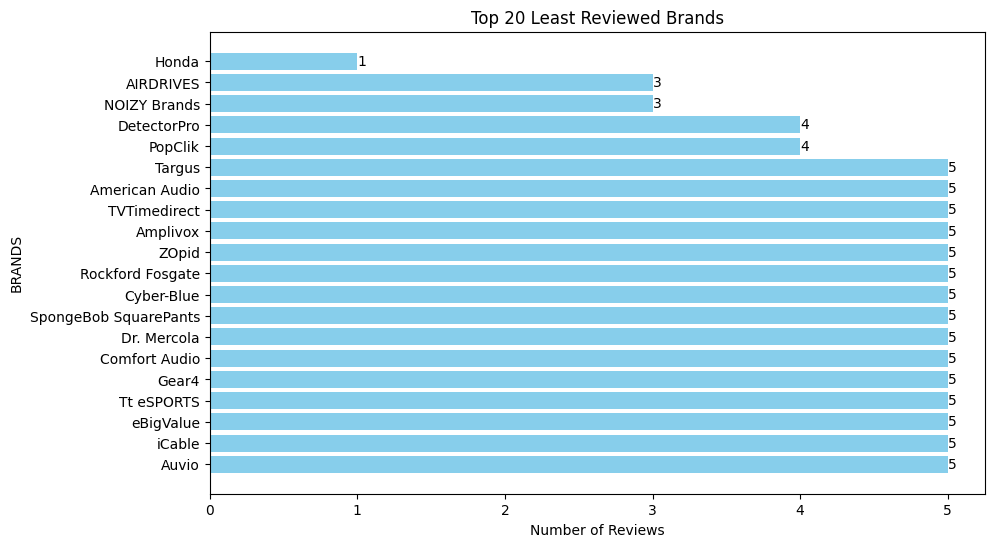

In [61]:
top_20_asins = sorted(brand_dict.items(), key=lambda x: x[1])[:20]

brands = [brand[0] for brand in top_20_asins]
review_counts = [brand[1] for brand in top_20_asins]

plt.figure(figsize=(10, 6))
bars = plt.barh(brands, review_counts, color='skyblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black')

plt.xlabel('Number of Reviews')
plt.ylabel('BRANDS')
plt.title('Top 20 Least Reviewed Brands')
plt.gca().invert_yaxis()  
plt.show()

**c) Most Positively reviewed Headphone**

In [62]:
product_data = product_df.copy()

#calculate sentiment polarity for each review text
product_data['sentiment_polarity'] = product_data['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

#group by 'asin' and calculate the average sentiment polarity for each product
average_sentiments = product_data.groupby('asin')['sentiment_polarity'].mean()

#find the product with the highest average sentiment polarity
most_positively_reviewed_product = average_sentiments.idxmax()
highest_average_sentiment = average_sentiments.max()

print("Most Positively Reviewed Product (ASIN):", most_positively_reviewed_product)
print("Highest Average Sentiment Polarity:", highest_average_sentiment)

Most Positively Reviewed Product (ASIN): B016IPL5MM
Highest Average Sentiment Polarity: 0.7304761904761904


**d) Count of ratings for the product for 5 consecutive years**

In [63]:
product_df['reviewTime'] = pd.to_datetime(product_df['reviewTime'])

filtered_data = product_df[(product_df['reviewTime'].dt.year >= 2000) & (product_df['reviewTime'].dt.year < 2005)]

#group by reviewYear and count the number of ratings for each year
rating_counts = filtered_data.groupby(filtered_data['reviewTime'].dt.year)['overall'].count()

C:\Users\shiva\AppData\Local\Temp\ipykernel_19944\771741789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['reviewTime'] = pd.to_datetime(product_df['reviewTime'])


In [64]:
print(rating_counts)

reviewTime
2000     17
2001     17
2002     50
2003    120
2004    274
Name: overall, dtype: int64


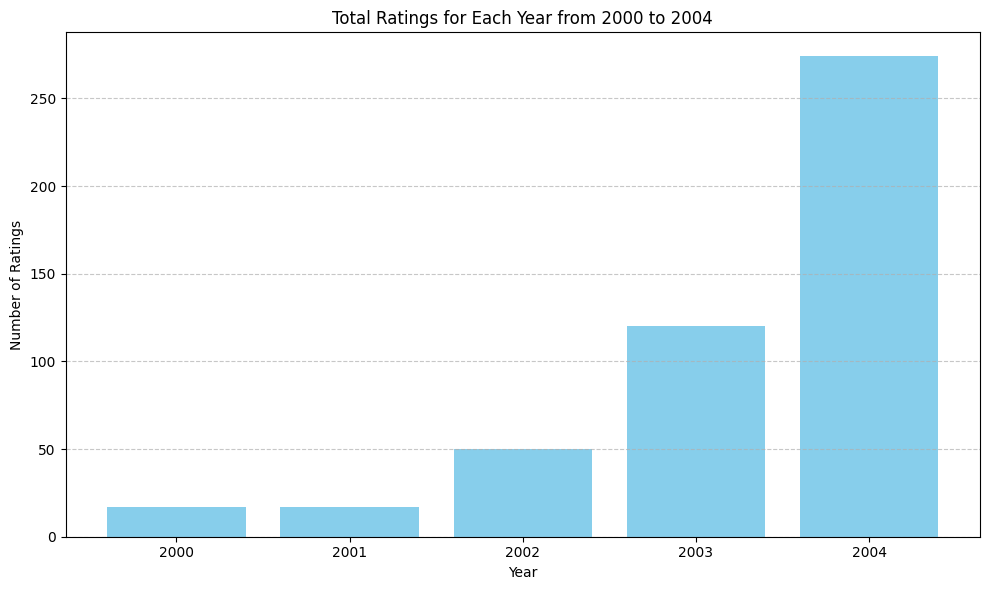

In [65]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Total Ratings for Each Year from 2000 to 2004')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**e) Word Cloud for ‘Good’ and ‘Bad’ ratings**

In [66]:
def classify_review(sentiment_polarity):
    if sentiment_polarity > 0:
        return 'Good'
    elif sentiment_polarity < 0:
        return 'Bad'
    else:
        return 'Neutral'

In [67]:
#calculate sentiment polarity for each reviewText
product_df['sentiment_polarity'] = product_df['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

C:\Users\shiva\AppData\Local\Temp\ipykernel_19944\518116074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['sentiment_polarity'] = product_df['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [68]:
#classify reviews as 'Good' or 'Bad'
product_df['review_class'] = product_df['sentiment_polarity'].apply(classify_review)

C:\Users\shiva\AppData\Local\Temp\ipykernel_19944\3864266862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['review_class'] = product_df['sentiment_polarity'].apply(classify_review)


In [69]:
good_reviews = ' '.join(product_df[product_df['review_class'] == 'Good']['reviewText'])
bad_reviews = ' '.join(product_df[product_df['review_class'] == 'Bad']['reviewText'])

In [70]:
'''
#Word Cloud for Good ratings
wordcloud_good = WordCloud(width=800, height=400, background_color='white', font_path='C://Windows//Fonts//arial.ttf').generate(good_reviews)

#Word Cloud for Bad ratings
wordcloud_bad = WordCloud(width=800, height=400, background_color='white', font_path='C://Windows//Fonts//arial.ttf').generate(bad_reviews)""
'''

'\n#Word Cloud for Good ratings\nwordcloud_good = WordCloud(width=800, height=400, background_color=\'white\', font_path=\'C://Windows//Fonts//arial.ttf\').generate(good_reviews)\n\n#Word Cloud for Bad ratings\nwordcloud_bad = WordCloud(width=800, height=400, background_color=\'white\', font_path=\'C://Windows//Fonts//arial.ttf\').generate(bad_reviews)""\n'

In [71]:
'''
#plot Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.title('Word Cloud for Good Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title('Word Cloud for Bad Reviews')
plt.axis('off')

plt.show()
'''

"\n#plot Word Clouds\nplt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1)\nplt.imshow(wordcloud_good, interpolation='bilinear')\nplt.title('Word Cloud for Good Reviews')\nplt.axis('off')\n\nplt.subplot(1, 2, 2)\nplt.imshow(wordcloud_bad, interpolation='bilinear')\nplt.title('Word Cloud for Bad Reviews')\nplt.axis('off')\n\nplt.show()\n"

**f) Pie Chart for Distribution of Ratings vs No. of Reviews**

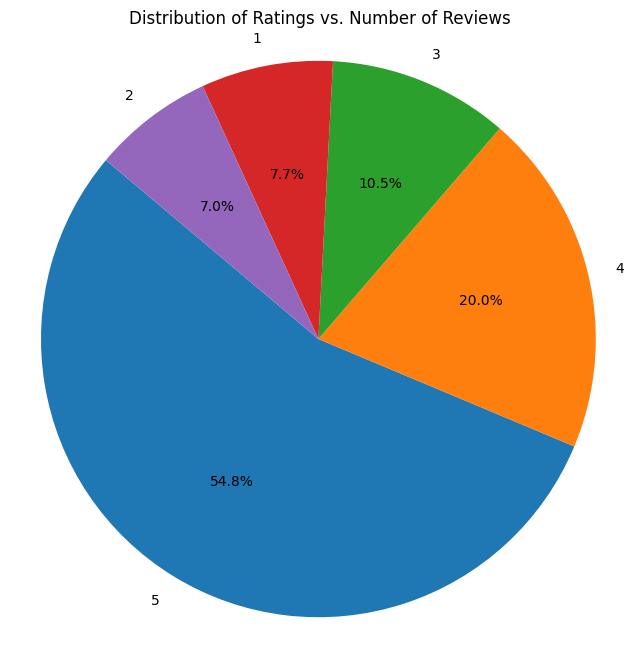

In [72]:
rating_distribution = product_data['overall'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. Number of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**g) Year of Maximum Reviews**

In [73]:
df = product_df[(product_df['reviewTime'].dt.year >= 2000)]

#group by reviewYear and count the number of ratings for each year
rating_counts = df.groupby(df['reviewTime'].dt.year)['reviewText'].count()

In [74]:
print('Maximum Reviews:', rating_counts.max(), 'in year:', rating_counts.idxmax())

Maximum Reviews: 65691 in year: 2016


**h) Year with highest number of Customers**

In [75]:
df = product_df[(product_df['reviewTime'].dt.year >= 2000)]
customer_count_by_year = df.groupby(df['reviewTime'].dt.year)['reviewerID'].count()

In [76]:
print('Maximum Customers:', customer_count_by_year.max(), 'in year:', customer_count_by_year.idxmax())

Maximum Customers: 65691 in year: 2016


In [77]:
product_df.shape

(261120, 14)

# Feature Engineering

**Hashing Vectorizer**

In [78]:
hash_vectorizer = HashingVectorizer(n_features=1000) 
hashed_features = hash_vectorizer.fit_transform(product_df['reviewText'])

In [79]:
hashed_features.shape

(261120, 1000)

**Classifying Ratings**

In [80]:
def classify_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating < 3:
        return 'Bad'
    else:
        return 'Average'

In [81]:
product_df['ratingClass'] = product_df['overall'].apply(classify_rating)

C:\Users\shiva\AppData\Local\Temp\ipykernel_19944\2210544256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['ratingClass'] = product_df['overall'].apply(classify_rating)


In [82]:
product_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,sentiment_polarity,review_class,ratingClass
0,5,2.0,True,2013-02-28,A15U5NUS1EY7IQ,B000001OMI,{'Format:': ' Personal Computers'},S. Bommarito,im getting listening station going several ele...,Works well,1362009600,0,0.166667,Good,Good
1,5,5.0,True,2012-10-17,AHGGNAIT6BH5X,B000001OMI,0,Edward H,needed headset watching editing video late nig...,HP 200 Stereo Headset,1350432000,0,0.270833,Good,Good
2,4,0,False,2012-09-27,A33HUURDJ4DVG3,B000001OMI,{'Format:': ' Personal Computers'},HB,wa town month needed pair headphone walking wa...,"For the price, you cannot beat them",1348704000,0,0.069907,Good,Good
3,5,4.0,True,2008-11-27,A680RUE1FDO8B,B000001OMI,{'Format:': ' Personal Computers'},Jerry Saperstein,obviously headphone audiophile person expects ...,Excellent day-to-day headphones,1227744000,0,0.106364,Good,Good
4,3,2.0,False,2007-12-24,A3OLAZKM77XR6P,B000001OMI,{'Format:': ' Personal Computers'},Tennis Ace,bought headphone tower records year ago nice f...,Foldable but didn't last long,1198454400,0,0.047959,Good,Average


**Creating Train and Test sets**

In [83]:
X = hashed_features
y = product_df['ratingClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
print("Training set size (X, y):", X_train.shape, y_train.shape)
print("Testing set size (X, y):", X_test.shape, y_test.shape)

Training set size (X, y): (195840, 1000) (195840,)
Testing set size (X, y): (65280, 1000) (65280,)


# Training ML Models

**a) Logistic Regression**

In [85]:
logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train, y_train)
    
#make predictions
y_pred = logisticRegression.predict(X_test)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.41      0.08      0.13      6931
         Bad       0.65      0.54      0.59      9639
        Good       0.84      0.96      0.89     48710

    accuracy                           0.81     65280
   macro avg       0.63      0.53      0.54     65280
weighted avg       0.76      0.81      0.77     65280



**b) AdaBoost Classifier**

In [90]:
adamodel = AdaBoostClassifier(n_estimators=100, random_state=42)
adamodel.fit(X_train, y_train)

#make predictions
y_pred = adamodel.predict(X_test)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.43      0.06      0.11      6931
         Bad       0.62      0.47      0.53      9639
        Good       0.82      0.96      0.89     48710

    accuracy                           0.79     65280
   macro avg       0.62      0.50      0.51     65280
weighted avg       0.75      0.79      0.75     65280



**c) Gaussian Naive Bayes**

In [93]:
nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)

#make predictions
y_pred = nb.predict(X_test.toarray())

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.19      0.46      0.26      6931
         Bad       0.39      0.57      0.46      9639
        Good       0.90      0.63      0.74     48710

    accuracy                           0.60     65280
   macro avg       0.49      0.55      0.49     65280
weighted avg       0.75      0.60      0.65     65280



**d) K-Nearest Neighbors**

In [95]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#make predictions
y_pred = knn.predict(X_test)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.25      0.06      0.10      6931
         Bad       0.52      0.19      0.28      9639
        Good       0.78      0.96      0.86     48710

    accuracy                           0.75     65280
   macro avg       0.52      0.40      0.41     65280
weighted avg       0.68      0.75      0.69     65280



**e) Multi Layer Perceptron**

In [98]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.28      0.27      0.27      6931
         Bad       0.56      0.55      0.56      9639
        Good       0.87      0.88      0.88     48710

    accuracy                           0.77     65280
   macro avg       0.57      0.57      0.57     65280
weighted avg       0.76      0.77      0.76     65280



**Save the final data**

In [99]:
product_df.to_csv('final_product_data.csv')
meta_df.to_csv('final_meta_data.csv')